# Requirements

In [58]:

# pip install pycocotools
# pip install scikit-image
# pip install keras
# pip install tensorflow
# pip install requests


# Imports

In [5]:

from pycocotools.coco import COCO
import requests

import numpy as np
import cv2

from typing import List, Dict, Any

import os
import zipfile

import skimage.io as io
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Research


**Coco dataset** is available here:

> https://cocodataset.org/#download

**Download the following files:**

> instances_train2017.json

> instances_val2017.json

**Targeted categories:**

> glass, cup, bowl, apple, vase

**Call the coco api to get images:**

> coco_annotations_getter.get_images_by_category(instances_annotations, 'cup')

> coco_annotations_getter.show_image(value['coco_url'])


# CocoDatasetDownloader

In [28]:

class CocoDatasetDownloader:
    def __init__(self) -> None:
        self.image_url = "http://images.cocodataset.org/zips/train2017.zip"
        self.annotation_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
        self.image_zip_file = "data/train2017.zip"
        self.annotation_zip_file = "data/annotations_trainval2017.zip"
    
    # TODO: Method download_images downloads not a valid ZIP archive
    def download_images(self) -> None:
        count = 0 
        
        if not os.path.exists(self.image_zip_file):
            r = requests.get(self.image_url, stream=True)
            
            with open(self.image_zip_file, 'wb') as f:
                print("Downlading started")
                
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
                    
                    # keep track
                    count = count + 1
                    if count % 100 == 0:
                        print(count)

    def download_annotations(self) -> None:
        count = 0 
        
        if not os.path.exists(self.annotation_zip_file):
            r = requests.get(self.annotation_url, stream=True)
            
            with open(self.annotation_zip_file, 'wb') as f:
                print("Downlading started")
                
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

                    # keep track
                    count = count + 1
                    if count % 100 == 0:
                        print(count)
                    
    def extract_images(self) -> None:
        with zipfile.ZipFile(self.image_zip_file, 'r') as zip_ref:
            zip_ref.extractall()

    def extract_annotations(self) -> None:
        with zipfile.ZipFile(self.annotation_zip_file, 'r') as zip_ref:
            zip_ref.extractall('data/')


# CocoAnnotationsGetter

In [6]:

class CocoAnnotationsGetter:    
    def load_annotations(self, path: str) -> None:
        return COCO(path)
    
    def get_annotations_categories(self, instances_annotations) -> None:
        cats = instances_annotations.loadCats(instances_annotations.getCatIds())
        
        nms=[cat['name'] for cat in cats]
        
        nms = set([cat['supercategory'] for cat in cats])
        
        print('COCO categories: \n{}\n'.format(' '.join(nms)))
        print('COCO supercategories: \n{}'.format(' '.join(nms)))
        
    def get_images_by_category(self, instances_annotations, category: str) -> Dict[str, Dict[str, Any]]:
        category_id = instances_annotations.getCatIds(catNms=[category])
        
        image_ids = instances_annotations.getImgIds(catIds=category_id)
    
        images = {}

        for img_id in image_ids:
            images[str(img_id)] = instances_annotations.loadImgs(img_id)[0]

        return category_id[0], images
    
    def get_bounding_boxes_by_image_id(self, instances_annotations, image_id: int) -> None: 
        annotations_ids = instances_annotations.getAnnIds(imgIds=image_id)
        
        bounding_boxes = instances_annotations.loadAnns(annotations_ids)
        
        return bounding_boxes
    
    def show_image(self, url: str) -> None:
        image = io.imread(url)
        
        plt.axis('off')
        plt.imshow(image)
        plt.show()
        
    def save_image(self, url: str) -> None:
        response = requests.get(url)
        
        if response.status_code == 200:
            image_data = BytesIO(response.content)
            image_array = np.asarray(bytearray(image_data.read()), dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

            cv2.imwrite("./data", image)

coco_annotations_getter = CocoAnnotationsGetter()


# Download dataset

In [21]:

coco_dataset_downloader = CocoDatasetDownloader()


In [21]:

coco_dataset_downloader.download_images()


In [22]:

coco_dataset_downloader.download_annotations()


In [14]:

# TODO: Method download_images downloads not a valid ZIP archive
# coco_dataset_downloader.extract_images()


In [22]:

coco_dataset_downloader.extract_annotations()


# Explore data 

## Instances annotations

In [8]:

instances_annotations = coco_annotations_getter.load_annotations("data/instances_train2017.json")


loading annotations into memory...
Done (t=42.31s)
creating index...
index created!


In [7]:

coco_annotations_getter.get_annotations_categories(instances_annotations)


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen appliance person outdoor electronic vehicle sports furniture indoor accessory animal food


In [14]:

category_id, instances_annotations_images = coco_annotations_getter.get_images_by_category(instances_annotations, 'cup')

print(f"Cat. ID {category_id}")

image_98304 = instances_annotations_images.get("98304")
image_196619 = instances_annotations_images.get("196619")

print(image_98304)
print(image_196619)


Cat. ID 47
{'license': 1, 'file_name': '000000098304.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000098304.jpg', 'height': 424, 'width': 640, 'date_captured': '2013-11-21 23:06:41', 'flickr_url': 'http://farm6.staticflickr.com/5062/5896644212_a326e96ea9_z.jpg', 'id': 98304}
{'license': 1, 'file_name': '000000196619.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000196619.jpg', 'height': 500, 'width': 389, 'date_captured': '2013-11-17 20:34:28', 'flickr_url': 'http://farm1.staticflickr.com/5/5018578_c2d953bfcd_z.jpg', 'id': 196619}


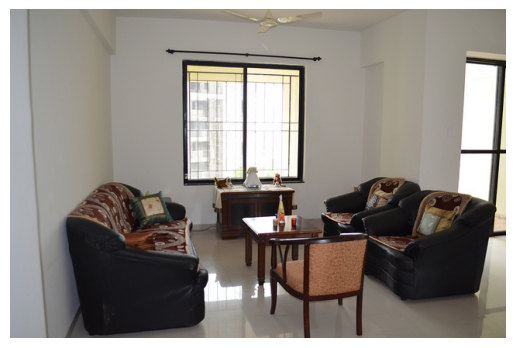

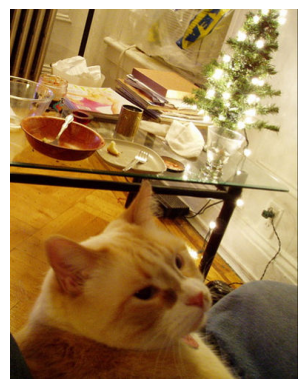

In [15]:

coco_annotations_getter.show_image(image_98304.get("coco_url"))
coco_annotations_getter.show_image(image_196619.get("coco_url"))


In [55]:

image_id = image_196619.get("id")

# get bounding boxes by image and category id
instances_annotations_bounding_boxes = coco_annotations_getter.get_bounding_boxes_by_image_id(instances_annotations, image_id)

bounding_boxes = []

for bounding_box in instances_annotations_bounding_boxes:
    if bounding_box['category_id'] == category_id:
        bounding_boxes.append(bounding_box['bbox'])


In [63]:

counter = 0
rectangles = []

for bounding_box in bounding_boxes:
    diff_x_min_x_max = int(bounding_box[2])
    diff_y_min_y_max = int(bounding_box[3])
    
    x_min = int(bounding_box[0])
    x_max = x_min + diff_x_min_x_max
    
    y_min = int(bounding_box[1])
    y_max = y_min + diff_y_min_y_max
    
    rectangles.append(patches.Rectangle((bounding_box[0], bounding_box[1]), bounding_box[2], bounding_box[3], linewidth=1, edgecolor='r', facecolor='none'))

    # Crop the image using NumPy array slicing
    cropped_image = image_array[y_min:y_max, x_min:x_max, :]
    
    # Convert RGB to BGR
    image_array_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    
    # Save the cropped image to a file
    image_name = f"train_cropped_image_{image_id}_object_{counter}.jpg"
    cv2.imwrite(f"data/{image_name}", image_array_bgr)

    counter = counter + 1
    

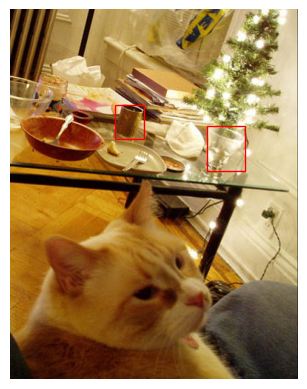

In [64]:

image = io.imread(image_196619.get("coco_url"))

for rectangle in rectangles:
    plt.gca().add_patch(rectangle)
    
plt.imshow(image)
plt.axis('off')
plt.show()
    

# Train CNN

## Download images for categories glass, cup, bowl, apple, vase

In [ ]:

# TODO


## Load data

In [2]:

# explore keras mnist dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


2023-11-17 16:12:26.742603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# the data that model will learn from
# train_images, train_labels
# The images are encoded as Numpy arrays, and 
# the labels are an array of digits, ranging from 0 to 9.


In [3]:
len(train_images[0])

28

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:

# 28x28 pixels
img_1 = train_images[0]


In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels[0]

5